In [7]:
!unzip IMDB_dataset.zip

Archive:  IMDB_dataset.zip
  inflating: IMDB Dataset.csv        


In [1]:
!pip install nltk
!pip install contractions
!pip install gensim
!pip install ace_tools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 11.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from contractions import fix
import re


In [8]:
df = pd.read_csv('IMDB Dataset.csv')

In [9]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape #Good size of data to perform sentiment analysis

(50000, 2)

In [ ]:
#Viewing sample data to get an idea of how the sentence looks
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [10]:
nltk.download('punkt') #Downloads pretrained sentence transformers
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords') #Downloads the stopwords library which is used for preprocessing text data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Text preprocessing steps to include
1. Stop words removal
2. Lower-case conversion
3. Remove punctuations and numbers
4. Tokenization
5. Lemmatization - Removing word suffixes


In [11]:
stop_words = set(stopwords.words('english'))
stop = list(stop_words)[:5]
print("Total number of stopwords which are included", len(stop_words),"\nExample of some stopwords from the library", stop)

Total number of stopwords which are included 179 
Example of some stopwords from the library ['shouldn', 'haven', 'hasn', 'any', 'you']


In [12]:
#Text preprocessing function
def preprocess_text(text):
    text = text.lower() #Converts all text to lower-case
    text = re.sub(r'<br\s*/?>', ' ', text) #Removes <br> </br> from sentences
    text = " ".join(text.split()) #Removes extra whitespaces
    text = fix(text) #Converts "I can't believe this!" --> "I cannot believe this!"
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()] #Words get added to the list only if it is an alphabet
    tokens = [word for word in tokens if word not in stop_words] #Removes the stopwords from the previous list of words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens] #Removes suffixes of words from the previous list
    return tokens

In [13]:
#Apply preprocessing
df['tokens'] = df['review'].apply(lambda x: preprocess_text(x))

df.head()


,review,sentiment,tokens
0,One of the other reviewers has mentioned that ...,positive,"[one, reviewer, mentioned, watching, oz, episo..."
1,A wonderful little production. <br /><br />The...,positive,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,"[basically, family, little, boy, jake, think, ..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, love, time, money, visually, ..."


In [14]:
df['tokens'][1]

['wonderful',
 'little',
 'production',
 'filming',
 'technique',
 'fashion',
 'give',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'actor',
 'extremely',
 'well',
 'michael',
 'sheen',
 'got',
 'polari',
 'voice',
 'pat',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'reference',
 'williams',
 'diary',
 'entry',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'one',
 'great',
 'master',
 'comedy',
 'life',
 'realism',
 'really',
 'come',
 'home',
 'little',
 'thing',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'technique',
 'remains',
 'solid',
 'disappears',
 'play',
 'knowledge',
 'sens',
 'particularly',
 'scene',
 'concerning',
 'orton',
 'halliwell',
 'set',
 'particularly',
 'flat',
 'halliwell',
 'mural',
 'decorating',
 'every',
 'surface',
 'terribly',
 'well',
 'done']

# Importing Word2Vec embedding model

In [15]:
from gensim.models import Word2Vec

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df['tokens'], vector_size=200, window=8, min_count=5, workers=4)

# Save the model
word2vec_model.save("word2vec.model")

In [16]:
#Getting top 5 similar words just as an example
similar_words = word2vec_model.wv.most_similar('wonderful', topn=5)
print(similar_words)

[('fantastic', 0.8112360835075378), ('excellent', 0.7787840962409973), ('terrific', 0.7672972679138184), ('superb', 0.7620252966880798), ('fabulous', 0.755974292755127)]


In [17]:
# Get vocabulary words
words = list(word2vec_model.wv.index_to_key)

# Extract word vectors
word_vectors = [word2vec_model.wv[word] for word in words]

print(f"Vocabulary Size: {len(words)}")

Vocabulary Size: 34014


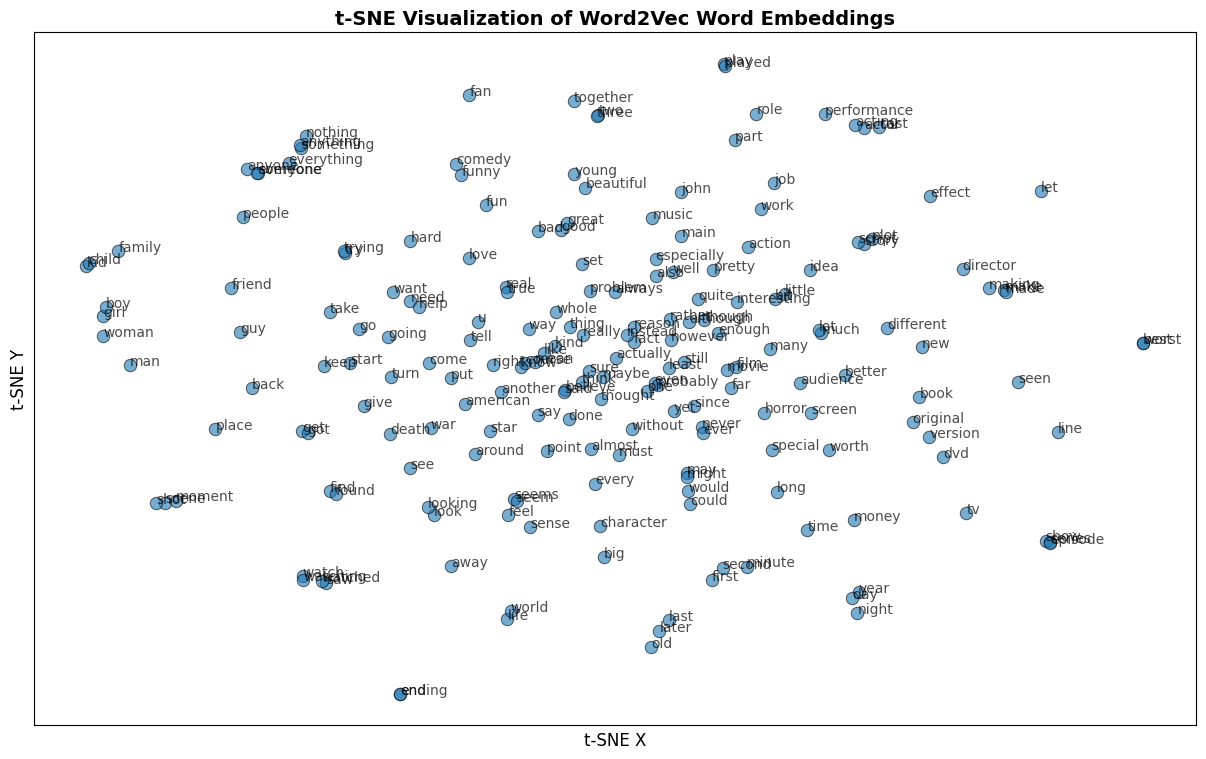

In [18]:
# Alternativey, here PCA could also be used for dimensionality reduction but this is better when using word2vec
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

word_vectors_np = np.array(word_vectors[:200])  # Make sure it's a (200, vector_size) array

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors_np)

# Convert to DataFrame
tsne_df = pd.DataFrame(word_vectors_2d, columns=['x', 'y'])
tsne_df['word'] = words[:200]  # Assign words

# Create figure with improved aesthetics
fig, ax = plt.subplots(figsize=(15, 9))

# Set background transparency
ax.set_facecolor((1, 1, 1, 0.05))  # Light transparent background

# Scatter plot with customized style
sns.scatterplot(x=tsne_df['x'], y=tsne_df['y'], alpha=0.6, s=80, edgecolor='k')

# Annotate words (optional: set text=False to disable)
text = True  # Change to False to disable text labels
if text:
    for i, word in enumerate(tsne_df['word']):
        ax.text(tsne_df['x'][i], tsne_df['y'][i], word, fontsize=10, alpha=0.7)

# Titles and labels
plt.title("t-SNE Visualization of Word2Vec Word Embeddings", fontsize=14, fontweight='bold')
plt.xlabel("t-SNE X", fontsize=12)
plt.ylabel("t-SNE Y", fontsize=12)

plt.xticks([])
plt.yticks([])
plt.grid(False)

plt.show()

In [19]:
# Visualizing document vectors which will be given as an input to the neural network model
def document_vector(words, model):
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

doc_vectors = np.array([document_vector(tokens, word2vec_model) for tokens in df['tokens']])
doc_vectors

array([[-0.01351227,  0.057384  , -0.11646126, ...,  0.08638807,
         0.22316854,  0.0365332 ],
       [-0.02200581,  0.09580329, -0.12304462, ...,  0.18469729,
        -0.31846026, -0.20626672],
       [-0.22300325,  0.15345895, -0.17588267, ...,  0.05391876,
        -0.01204237, -0.03251576],
       ...,
       [-0.00485886, -0.152527  , -0.4020113 , ...,  0.03413497,
         0.2294666 ,  0.04262668],
       [-0.02111736, -0.01407158, -0.16209343, ..., -0.10018598,
        -0.01199944, -0.04774567],
       [-0.58276266,  0.06480374, -0.5101345 , ...,  0.02955489,
         0.15548258,  0.02344783]], dtype=float32)

# Training Neural Network Model For Sentiment Analysis

In [20]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})


In [22]:
from torch.utils.data import DataLoader, TensorDataset
import torch
import torch.nn as nn
import torch.optim as optim

# Function to compute sentence/document embedding by averaging Word2Vec word vectors
def sentence_embedding(words, model):
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

# Convert all reviews into numerical vectors
X_data = np.array([sentence_embedding(tokens, word2vec_model) for tokens in df['tokens']])

# Convert sentiment labels into a NumPy array
y_data = np.array(df['sentiment'])  # 1 = positive, 0 = negative

# Convert NumPy arrays to PyTorch tensors
X_tensor = torch.tensor(X_data, dtype=torch.float32)  # Feature tensor

# Ensure labels are numeric (convert to int if necessary)
y_data = np.array(df['sentiment'], dtype=np.float32)  # Convert to float32

# Convert to PyTorch tensor
y_tensor = torch.tensor(y_data, dtype=torch.float32).view(-1, 1)  # Reshape for BCE Loss


# Create DataLoader for batch processing
batch_size = 64
dataset = TensorDataset(X_tensor, y_tensor)



Epoch [1/15], Loss: 0.3485, Train Acc: 87.60%, Valid Acc: 87.01%
Epoch [2/15], Loss: 0.3171, Train Acc: 86.91%, Valid Acc: 86.48%
Epoch [3/15], Loss: 0.3120, Train Acc: 88.36%, Valid Acc: 87.49%
Epoch [4/15], Loss: 0.3080, Train Acc: 88.49%, Valid Acc: 87.57%
Epoch [5/15], Loss: 0.3039, Train Acc: 88.66%, Valid Acc: 87.47%
Epoch [6/15], Loss: 0.3006, Train Acc: 88.58%, Valid Acc: 87.20%
Epoch [7/15], Loss: 0.2982, Train Acc: 89.14%, Valid Acc: 87.63%
Epoch [8/15], Loss: 0.2926, Train Acc: 89.05%, Valid Acc: 87.62%
Epoch [9/15], Loss: 0.2900, Train Acc: 89.39%, Valid Acc: 87.81%
Epoch [10/15], Loss: 0.2877, Train Acc: 89.00%, Valid Acc: 87.42%
Epoch [11/15], Loss: 0.2866, Train Acc: 88.89%, Valid Acc: 87.37%
Epoch [12/15], Loss: 0.2827, Train Acc: 89.54%, Valid Acc: 87.34%
Epoch [13/15], Loss: 0.2802, Train Acc: 89.23%, Valid Acc: 87.53%
Epoch [14/15], Loss: 0.2792, Train Acc: 89.87%, Valid Acc: 87.74%
Epoch [15/15], Loss: 0.2746, Train Acc: 89.94%, Valid Acc: 87.88%


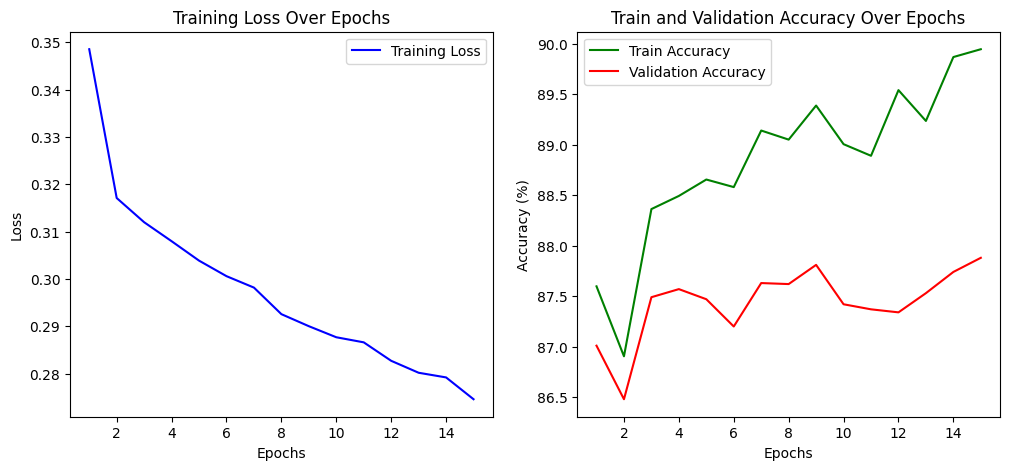

In [27]:
train_size = int(0.8 * len(dataset))
valid_size = len(dataset) - train_size
train_dataset, valid_dataset = torch.utils.data.random_split(dataset, [train_size, valid_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# Define Sentiment Classifier Model
class SentimentClassifier(nn.Module):
    def __init__(self, input_size):
        super(SentimentClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()

        self.fc4 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        x = self.relu3(x)

        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

# Initialize Model
input_size = X_data.shape[1]  # Word2Vec vector size
model = SentimentClassifier(input_size)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# Function to compute accuracy
def compute_accuracy(model, dataloader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch_X, batch_y in dataloader:
            outputs = model(batch_X)
            predictions = (outputs >= 0.5).float()
            correct += (predictions == batch_y).sum().item()
            total += batch_y.size(0)
    return (correct / total) * 100

train_accuracies = []
valid_accuracies = []
loss_values = []

# Train Model with Accuracy Tracking
num_epochs = 15
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    loss_values.append(avg_loss)

    train_accuracy = compute_accuracy(model, train_loader)
    valid_accuracy = compute_accuracy(model, valid_loader)
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Valid Acc: {valid_accuracy:.2f}%")

# Plot Loss and Accuracy
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), loss_values, label="Training Loss", color='blue')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label="Train Accuracy", color='green')
plt.plot(range(1, num_epochs + 1), valid_accuracies, label="Validation Accuracy", color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Train and Validation Accuracy Over Epochs")
plt.legend()

In [29]:
# Convert predictions to binary (0 or 1)
with torch.no_grad():
    predictions = model(X_tensor)
    predictions = (predictions >= 0.5).float()

# Compute accuracy
accuracy = (predictions.eq(y_tensor).sum() / y_tensor.shape[0]).item()
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 89.53%


#Sample Prediction

In [30]:
def predict_sentiment(text, model, word2vec_model):
    model.eval()

    # Tokenize and preprocess input text
    text = text.lower() #Converts all text to lower-case
    text = re.sub(r'<br\s*/?>', ' ', text) #Removes <br> </br> from sentences
    text = " ".join(text.split()) #Removes extra whitespaces
    text = fix(text) #Converts "I can't believe this!" --> "I cannot believe this!"
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()] #Words get added to the list only if it is an alphabet
    tokens = [word for word in tokens if word not in stop_words] #Removes the stopwords from the previous list of words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens] #Removes suffixes of words from the previous list
    word_vectors = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]

    # Convert sentence to Word2Vec embedding (average word vectors)
    if word_vectors:
        sentence_vector = np.mean(word_vectors, axis=0)
    else:
        sentence_vector = np.zeros(word2vec_model.vector_size)  # If no known words, return zero vector

    # Convert to PyTorch tensor
    input_tensor = torch.tensor(sentence_vector, dtype=torch.float32).view(1, -1)

    # Get model prediction
    with torch.no_grad():
        output = model(input_tensor)
        prediction = (output >= 0.5).float().item()  # Convert probability to binary (0 or 1)

    return "Positive" if prediction == 1 else "Negative"


In [31]:
# Sample Reviews
sample_texts = [
    "I absolutely love this movie! The story was amazing and the acting was fantastic.",
    "The movie was terrible. The plot made no sense and the acting was awful.",
    "It was an okay movie, some parts were great but others were boring.",
    "I would never watch this again, it was a waste of time.",
    "This film is a masterpiece! Incredible performances and a stunning soundtrack."
]

# Predict Sentiment for Sample Inputs
for text in sample_texts:
    sentiment = predict_sentiment(text, model, word2vec_model)
    print(f"Review: {text}\nPredicted Sentiment: {sentiment}\n")


Review: I absolutely love this movie! The story was amazing and the acting was fantastic.
Predicted Sentiment: Positive

Review: The movie was terrible. The plot made no sense and the acting was awful.
Predicted Sentiment: Negative

Review: It was an okay movie, some parts were great but others were boring.
Predicted Sentiment: Negative

Review: I would never watch this again, it was a waste of time.
Predicted Sentiment: Negative

Review: This film is a masterpiece! Incredible performances and a stunning soundtrack.
Predicted Sentiment: Positive

